# Zehirli/Zehirsiz Mantar Sınıflandırma(Mushroom classification) 🍄

Bu projede Kaggle’da bulunan “Mushroom Classification” datasetini kullanacağız.Dataset 8000’e yakın zehirli veya zehirsiz mantar ve 22 özelliğini içerir.Logistic regression, ridge classifier, karar ağaçları, Naive Bayes ve sinir ağları gibi sınıflandırma algoritmalarını kullanarak, özellikleri verilen bir mantarın zehirli olup olmadığını tahmin etmeye çalışacağız.

## Kütüphaneler

Gerekli kütüphaneleri import ediyoruz.


In [1]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Import Label Encoder ve train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import Logistic Regression, Ridge Classifier, Decision Tree
# Gaussian Naive Bayes, MLP Classifier ve Random Forest models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Classification Report function
from sklearn.metrics import classification_report


## Dataset ve Ön İşlemler

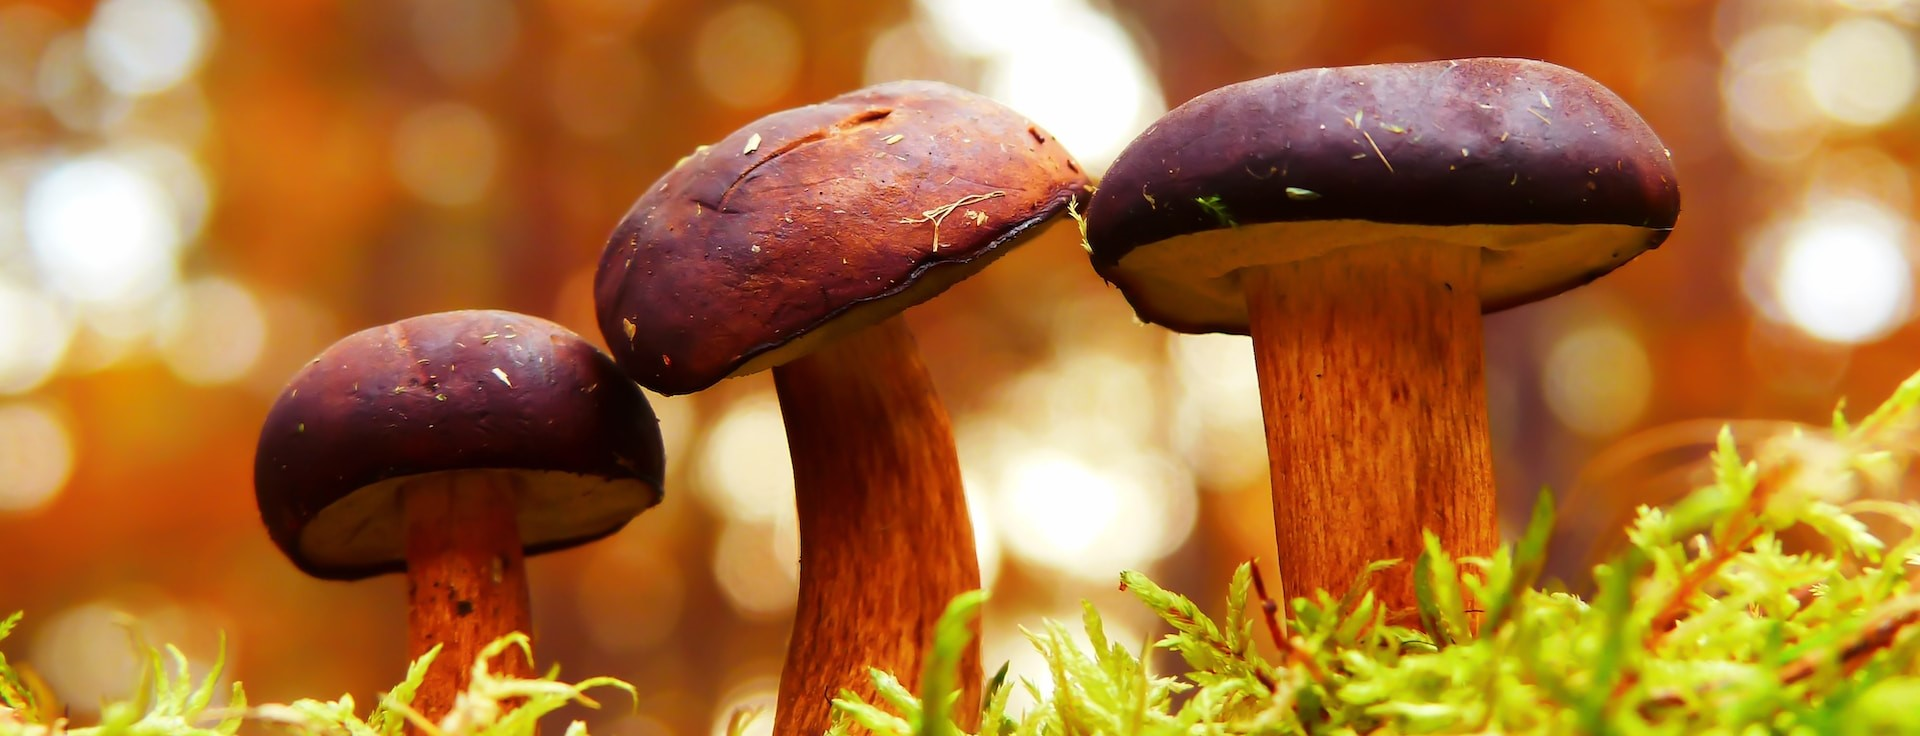

Veri seti 8124 mantardan elde edilen verileri içermektedir. Bu mantar örneklerinin her biri 22 özelliğe sahip olup yenilebilir ve zehirli olarak sınıflandırılmaktadır.

### Data Okuma

📌 Pandas kütüphanesinin *read_csv()* komutunu kullanrak .csv formatındaki datamızı okuyoruz.

In [3]:
# "mushroom.csv" dosyasını oku
data = pd.read_csv("/content/gdrive/My Drive/Kaggle/mushrooms.csv")

###Dataya Ön Bakış
*data.head()* fonksiyonunu kullanrak datamızın ilk 5 satırını görebiliriz.

In [4]:
# İlk 5 satırı yazdırmak için head() metodunu kullan
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Datamızı daha iyi anlamak için görselleştirme yapmalıyız.Mesela, bar grafiğini kullanarak datamızın "class" sütünunu gözlemleyebiliriz.

📌 value_counts() metodunu kullanarak class sütünundaki verilerin çeşitlerini ve her bir çeşitten kaç tane olduğunu gözlemleyebiliriz.

In [5]:
# Use value_counts method on "class" column of data object
classes = data["class"].value_counts()

# Print the result
classes

e    4208
p    3916
Name: class, dtype: int64

☝Class sütunu e(edible) ve p(poisonous) harflerinden oluşuyormuş."e"den 4208 "p"den 3916 tane varmış.

Yukarıdaki bilgileri bar grafiği oluşturarak görselleştirebiliriz.


📌 *.bar()* metodunu kullanarak kolaylıkla barları oluşturabiliriz.

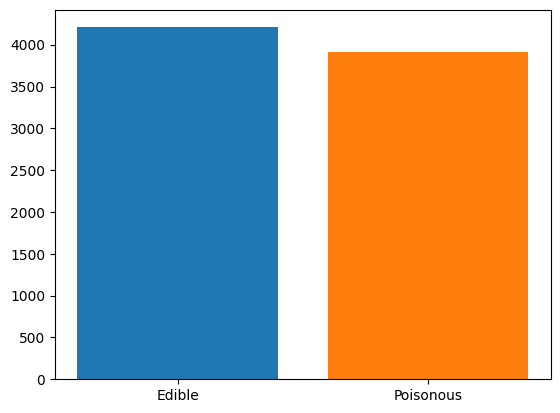

In [6]:
# Edible(yenilebilir) sınıfı için bar ekle
plt.bar("Edible", classes["e"])


# Poisonous(zehirli) sınıfı için bar ekle
plt.bar("Poisonous", classes["p"])


# Grafiği göstermek için
plt.show()

### Özellikler ve Etiketler

Modelimizi eğitmek için mantarın “cap-shape”(şapka şekli), “cap-color”(şapka rengi), “ring-number”(halka sayısı) and “ring-type”(halka tipi) özelliklerini kullanacağız.İstenirse bütün özellikler kullanılabilir.Hepsini kullanmak model eğitim süresini uzatabilir.

📌 .loc() methodunu kullanarak data datasetini X ve y datasetlerine ayırıyoruz.

In [8]:
# Seçtiğimiz özellikler içeren tablo için X adında bir değişken oluşturuyoruz.
X = data.loc[:, ["cap-shape", "cap-color", "ring-number", "ring-type"]]

# Çıkış etiketi için y değişkeni oluşturuyoruz.
y = data.loc[:, "class"]

###Değerleri Dönüştürme

Datasetteki veriler string formatta.Modelimizi oluşturmak için matematiksel işlemler yapacağız bu yüzden string değerleri integer değere çevirmeliyiz.Bunu label encoder kullanarak yapacağız.

📌 .fit_transform() metodu içine sutün alır.X datasetimiz birden fazla sütündan oluştuğu için for döngüsü kullanıyoruz.

📌 y tek sütündan oluştuğu için içine direk yazabiliriz.

In [9]:
# LabelEncoder objesi oluştur.
encoder = LabelEncoder()
# Özellikleri tek tek encode et
for i in X.columns:
  X[i] = encoder.fit_transform(X[i])

# Etiketleri encode et
y = encoder.fit_transform(y)


X ve y tablolarına bir göz atalım 👀


In [ ]:
#Print X
X

,cap-shape,cap-color,ring-number,ring-type
0,5,4,1,4
1,5,9,1,4
2,0,8,1,4
3,5,8,1,4
4,5,3,1,0
...,...,...,...,...
8119,3,4,1,4
8120,5,4,1,4
8121,2,4,1,4
8122,3,4,1,0


In [ ]:
#Print y
y

array([1, 0, 0, ..., 0, 1, 0])

### Data Ayırma


📌 .train_test_split() metodu ile datamızı train ve test olarak ayırıyoruz.Bu metod içine X(özellikleri), y(etiketi) ve test_size(istenilen test datası ayırma oranı) alır.Datanın %30'u test datası olarak seçilecek. Bu metod bize sırasıyla yeni X_train, X_test, y_train, y_test değerlerini döndürür.

In [ ]:
# Data seti train ve test olarak 70-30 oranında ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Eğitim Modelleri

Datamız eğitimlek için hazır !

📌 Model oluşturmak için ilgili sınıf isimlerini oluşturuyoruz.

In [ ]:
# LogisticRegression objesi oluştur
logistic_classifier_model = LogisticRegression()

# RidgeClassifier objesi oluştur
ridge_classifier_model = RidgeClassifier()

# DecisionTree obejesi oluştur
decision_tree_model = DecisionTreeClassifier()

# GaussianNB objesi oluştur(Naive Base)
naive_bayes_model = GaussianNB()

# MLPClassifier objesi oluştur(Sinir ağı)
neural_network_model = MLPClassifier()

Then, we train all models with the X_train and y_train dataset we created.
X_train ve y_train eğitim datamızı kullanarak modellerimizi eğitiyoruz.

📌 .fit() methodu ile modellerimizi eğitiyoruz.

In [ ]:
# LogisticRegression modelini eğit
logistic_classifier_model.fit(X_train, y_train)

# Ridge Classifier modelini eğit
ridge_classifier_model.fit(X_train, y_train)

# Decision Tree modelini eğit
decision_tree_model.fit(X_train, y_train)

# Naive Bayes modelini eğit
naive_bayes_model.fit(X_train, y_train)

# Neural Network(sinir ağları) modelini eğit
neural_network_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()


X_test(test için ayrılan mantar özellikleri içeren dataset) dataset kullanılarak mantarın zehirli olup olmadığı tahmin edilir.

📌 Tahmin değerleri *.predict()* metodu ile ilgili değişkenlere kaydedilir.

In [ ]:
# Test datasetini kullanarak Logistic Classifier model ile tahminde bulun
logistic_pred = logistic_classifier_model.predict(X_test)

# Test datasetini kullanarak Ridge Classifier model ile tahminde bulun
ridge_pred = ridge_classifier_model.predict(X_test)

# Test datasetini kullanarak Decision Tree model ile tahminde bulun
tree_pred = decision_tree_model.predict(X_test)

# Test datasetini kullanarak Naive Bayes model ile tahminde bulun
naive_bayes_pred = naive_bayes_model.predict(X_test)

# Test datasetini kullanarak Neural Network model ile tahminde bulun
neural_network_pred = neural_network_model.predict(X_test)

##Performans Karşılaştırması

Modelleri ne kadar doğru olduğunu karşılaştırmak için precision, recall, f-1 score, doğruluk değerleri her bir model için hesaplanmalı.

📌 Bu değerleri elde etmek için classification_report() foksiyonu kullanılır.



In [ ]:
# Logistic Classifier model için rapor
logistic_report = classification_report(y_test, logistic_pred)

# Ridge Classifier model için rapor
ridge_report = classification_report(y_test, ridge_pred)

# Decision Tree model için rapor
tree_report = classification_report(y_test, tree_pred)

# Naive Bayes model için rapor
naive_bayes_report = classification_report(y_test, naive_bayes_pred)

# Neural Network model için rapor
neural_network_report = classification_report(y_test, neural_network_pred)

In [ ]:
# Logistic Regression model raporu
print("******Logistic Regression**************")
print(logistic_report)

# Ridge Regression model raporu
print("******Ridge Regression*********")
print(ridge_report)

# Decision Tree model raporu
print("******Decision Tree*********")
print(tree_report)

# Naive Bayes model raporu
print("******Naive Bayes********")
print(naive_bayes_report)

# Neural Network model raporu
print("******Neural Network*******")
print(neural_network_report)

******Logistic Regression**************
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1270
           1       0.79      0.80      0.80      1168

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438

******Ridge Regression*********
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1270
           1       0.79      0.80      0.80      1168

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438

******Decision Tree*********
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1270
           1       0.89      0.93      0.91      1168

    accuracy                           0.91      2438
   macro avg       0.91    

### Değerlendirme

Decision tree(karar ağacı) modeli en iyi performansı gösterdi.Karar ağacı algoritmasının gelilmiş versiyonu diyebileceğimiz Random Forest algoritmasını da deneyelim, daha iyi performans gösterebilir.

📌 Yukarıdaki uyguladığımız adımları Random Foresta algoritması için de uyguluyoruz.

In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)

In [ ]:
random_forest_report = classification_report(y_test, random_forest_pred)

print(random_forest_report)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1270
           1       0.89      0.93      0.91      1168

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438

